In [1]:
import tensorflow.compat.v1 as tf

In [2]:
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


### Load dataset

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Prepare dataset

In [5]:
X_data = iris.data[:100]
Y_data = iris.target[:100]
print(Y_data.shape, X_data.shape)
print(Y_data)

(100,) (100, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
# 0 1 2

# 1 0 0
# 1 0 0 
# 0 1 0
# 0 0 1
# 1 0 0
# 0 1 0



In [7]:
import pandas as pd
Ydata = pd.get_dummies(Y_data).values
# Ydata

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_data, Ydata, test_size=.20,
                                               random_state=0, shuffle=True)

In [9]:
print(xtrain.shape, xtest.shape, ytrain.shape)

(80, 4) (20, 4) (80, 2)


### Define Hyperparameters

In [10]:
learning_rate = 0.01
epochs = 100 #no of iterations
n_hidden = 20 #No. of nodes on hidden layer
n_input = 4 #No of nodes on input layer = no. of features
n_output = 2 # No. of nodes on output layer = no. of classes

In [11]:
X = tf.placeholder(tf.float32, [None, n_input])
Y = tf.placeholder(tf.float32, [None, n_output])

- NN Structure 
<img src="ab.png">

In [12]:
w1 = tf.Variable(tf.random_normal([n_input,n_hidden]))
w2 = tf.Variable(tf.random_normal([n_hidden,n_output]))

b1 = tf.Variable(tf.random_normal([n_hidden]))
b2 = tf.Variable(tf.random_normal([n_output]))

### Feed Forward

In [14]:
# Hidden layer
l1_submission = tf.add(tf.matmul(X, w1), b1)
layer1 = tf.nn.relu(l1_submission)

output_layer = tf.add(tf.matmul(layer1, w2),b2)

### Define Cost function and Optimization Algorithm

<img src="CE.png">

In [ ]:
# pred = tf.sigmoid(output_layer)
# cost = -tf.reduce_sum(Y*tf.log(pred) + (1-Y)*tf.log(1-pred))

In [16]:
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    labels=Y, logits=output_layer))

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

### Run Graph

In [19]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
cc = []
for epoch in range(epochs):
    _, c = sess.run([optimizer, cost], feed_dict = {X:xtrain, Y:ytrain})
    cc.append(c)
    if epoch%10==0:
        print("Epoch:{} Cost:{}".format(epoch, c))

print("Trainin Finished!")

Epoch:0 Cost:5.6958513259887695
Epoch:10 Cost:1.0625503063201904
Epoch:20 Cost:0.4645913541316986
Epoch:30 Cost:0.2325955629348755
Epoch:40 Cost:0.14491206407546997
Epoch:50 Cost:0.10349136590957642
Epoch:60 Cost:0.08001561462879181
Epoch:70 Cost:0.06506143510341644
Epoch:80 Cost:0.05475302413105965
Epoch:90 Cost:0.047235261648893356
Trainin Finished!


In [24]:
cc

[5.6958513,
 4.9939027,
 4.3036757,
 3.6266189,
 2.9695523,
 2.3596463,
 1.8630203,
 1.5368936,
 1.3344208,
 1.1845318,
 1.0625503,
 0.9605681,
 0.8770978,
 0.80560875,
 0.74183345,
 0.6852916,
 0.63435346,
 0.5878477,
 0.5452093,
 0.5037237,
 0.46459135,
 0.42866975,
 0.39626384,
 0.36721748,
 0.34149653,
 0.3186691,
 0.2983048,
 0.2793452,
 0.26210958,
 0.24659848,
 0.23259556,
 0.21991499,
 0.20839672,
 0.19790319,
 0.1883153,
 0.17953041,
 0.17145951,
 0.16402534,
 0.1571607,
 0.1508067,
 0.14491206,
 0.13943246,
 0.13432932,
 0.12956521,
 0.12510909,
 0.12093341,
 0.117013715,
 0.11332818,
 0.109857306,
 0.10658358,
 0.103491366,
 0.10056647,
 0.09779619,
 0.09516893,
 0.09267433,
 0.09030284,
 0.08804584,
 0.08589549,
 0.08384462,
 0.08188668,
 0.080015615,
 0.07822593,
 0.07651253,
 0.07487078,
 0.07329639,
 0.071785375,
 0.07033408,
 0.06893903,
 0.067597166,
 0.06630556,
 0.065061435,
 0.06386231,
 0.06270587,
 0.061589766,
 0.060512125,
 0.05947093,
 0.058464397,
 0.057490893

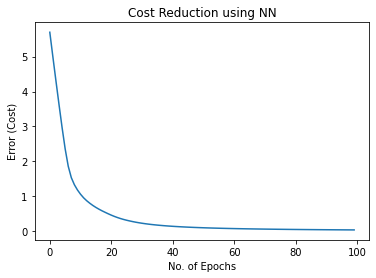

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(100), cc)
plt.xlabel("No. of Epochs")
plt.ylabel("Error (Cost)")
plt.title("Cost Reduction using NN")
plt.show()